### Student Information
Name: 翁瑞晴

Student ID: 108065513

GitHub ID: RitaWeng

Kaggle name: JuiChing

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM19-Lab2-Master Repo](https://github.com/EvaArevalo/DM19-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/179d01d4dd984fc5ac45a894822479dd) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Nov. 23rd 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM19-Lab2-Homework](https://github.com/EvaArevalo/DM19-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th 11:59 pm, Tuesday)__. 

# PART ONE 

## Take home exercises

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [3]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [4]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [5]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import numpy as np
import seaborn as sns
import matplotlib.mlab as mlab  
import matplotlib.pyplot as plt

count_vect = CountVectorizer()
train_counts = count_vect.fit_transform(train_df.text)
test_counts = count_vect.fit_transform(test_df.text)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)

In [6]:
count_vect.get_feature_names()[0:10]

['10', '11', '11am', '12', '12s', '138', '158', '15gets20', '16', '17']

In [7]:
term_frequencies = []
for j in range(0,train_counts.shape[1]):
    term_frequencies.append(sum(train_counts[:,j].toarray()))

In [8]:
term_frequencies_test = []
for j in range(0,test_counts.shape[1]):
    term_frequencies_test.append(sum(test_counts[:,j].toarray()))

In [9]:
term_frequencies = np.asarray(train_counts.sum(axis=0))[0]

In [10]:
term_frequencies_test = np.asarray(test_counts.sum(axis=0))[0]

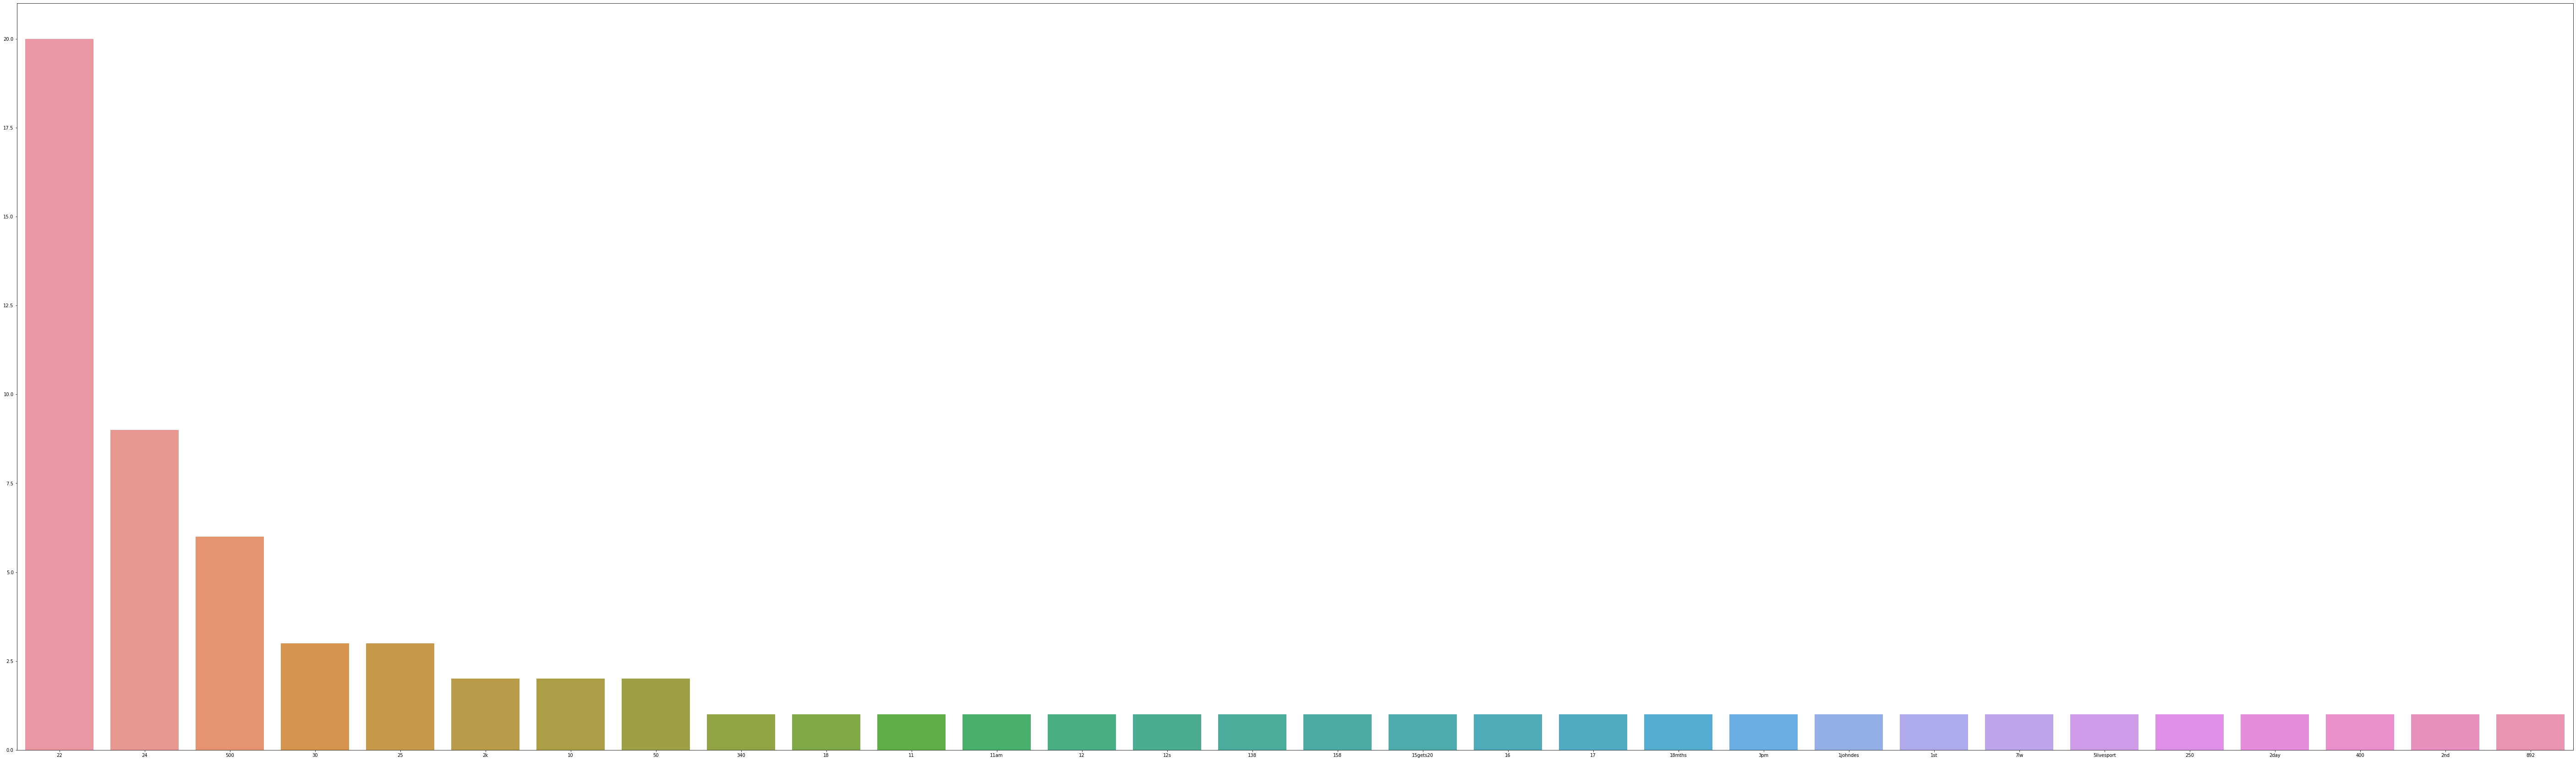

In [11]:
#plot word frequency of train dataset
plt.subplots(figsize=(100, 30))
term_fp_idx = np.argsort(term_frequencies[:30])
g = sns.barplot(x=np.array(count_vect.get_feature_names()[:30])[term_fp_idx][::-1], 
                y=term_frequencies[:300][term_fp_idx][::-1])
plt.show()

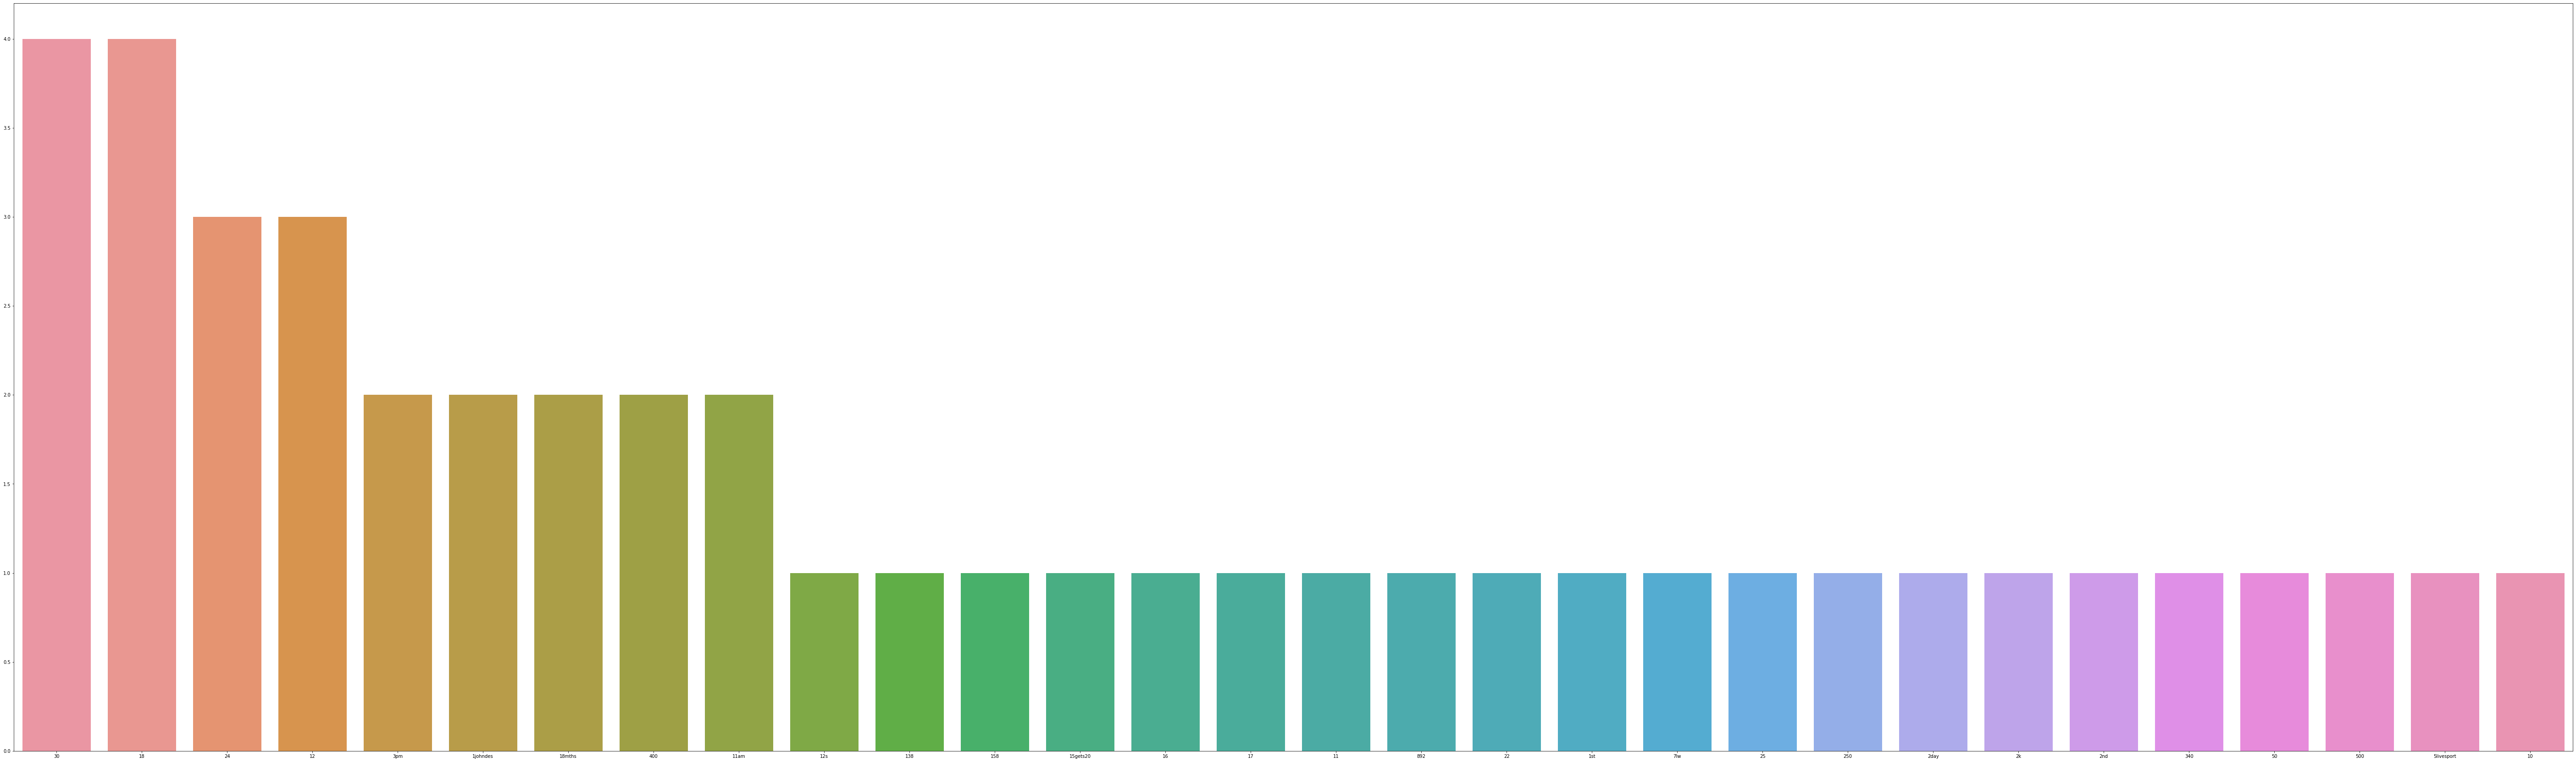

In [12]:
#plot word frequency of test dataset
plt.subplots(figsize=(100, 30))
term_fp_idx = np.argsort(term_frequencies_test[:30])
g_test = sns.barplot(x=np.array(count_vect.get_feature_names()[:30])[term_fp_idx][::-1], 
                y=term_frequencies_test[:300][term_fp_idx][::-1])
plt.show()

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [13]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)
vect = vectorizer.fit(train_df.text)
tfidf_train = vect.transform(train_df.text)
tfidf_given_test = vect.transform(test_df.text)

In [14]:
#show the features
vectorizer.get_feature_names()[100:110]

['bitter',
 'black',
 'blacks',
 'blame',
 'blessed',
 'blood',
 'bloody',
 'blues',
 'body',
 'boiling']

---
## Model
###  Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [15]:
from sklearn.tree import DecisionTreeClassifier

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize).fit(train_df['text']) 

# # apply analyzer to training data
# BOW_500.fit(train_df['text'])

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text']) #內容
y_train = train_df['emotion']     #標籤 label

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape) #500 features
print('y_train.shape: ', y_train.shape) #3613 labels no feature
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [16]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['fear', 'joy', 'anger', 'anger', 'anger', 'sadness', 'fear', 'joy',
       'sadness', 'fear'], dtype=object)

## 4. Results Evaluation

In [17]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.99
testing accuracy: 0.64


In [18]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.65      0.65      0.65        84
        fear       0.62      0.64      0.63       110
         joy       0.67      0.68      0.68        79
     sadness       0.61      0.57      0.59        74

    accuracy                           0.64       347
   macro avg       0.64      0.64      0.64       347
weighted avg       0.64      0.64      0.64       347



In [19]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[55 16  9  4]
 [15 70  9 16]
 [ 5 13 54  7]
 [ 9 14  9 42]]


In [20]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

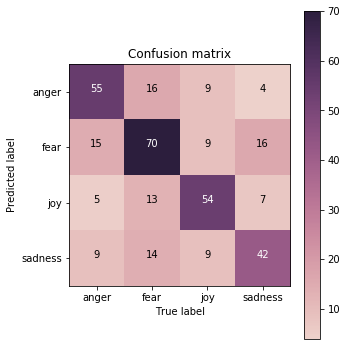

In [21]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

The picture above is the result of emotion prediction. The X-axis is the real emotion, the Y-axis is the emotion predicted by our model, and the diagonal is the result of correct prediction. Overall, there were 55 correct predictions of anger. The rest of all, 15 of which were predicted as fear but the real label were actually angry; 5 of them were predicted as joy but the real label were actually angry, and 9 were predicted as sadness but the real label were actually angry. 
In the situation of fear, there were 70 correct predictions of fear. The rest of all, 16 of which were predicted as anger but the real label were actually fear, 13 of them were predicted as joy but the real label were actually fear, and 14 were predicted as sadness but the real label were actually fear. 
In the situation of joy, there were 54 correct predictions of joy. The rest of all, 9 of which were predicted as anger but the real label were actually joy, 9 of them were predicted as feal but the real label were actually joy, and 9 were predicted as sadness but the real label were actually joy. 
In the situation of sadness, there were 42 correct predictions of sadness. The rest of all, 4 of which were predicted as anger but the real label were actually sadness, 16 of them were predicted as fear but the real label were actually sadness, and 7 were predicted as joy but the real label were actually sadness. 

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [22]:
from sklearn.naive_bayes import MultinomialNB

## build Navie Bayes model
clf = MultinomialNB()

## training!
clf = clf.fit(X_train, y_train)

## predict!
y_train_pred = clf.predict(X_train)
y_test_NB_pred = clf.predict(X_test)

## so we get the pred result
y_test_pred[:10]
print("Number of mislabeled points out of a total %d points : %d"
      % (X_train.shape[0],(y_test != y_test_NB_pred).sum()))

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_NB_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

print(classification_report(y_true=y_test, y_pred=y_test_NB_pred))

Number of mislabeled points out of a total 3613 points : 98
training accuracy: 0.79
testing accuracy: 0.72
              precision    recall  f1-score   support

       anger       0.71      0.65      0.68        84
        fear       0.74      0.83      0.78       110
         joy       0.76      0.71      0.73        79
     sadness       0.65      0.64      0.64        74

    accuracy                           0.72       347
   macro avg       0.71      0.71      0.71       347
weighted avg       0.72      0.72      0.72       347



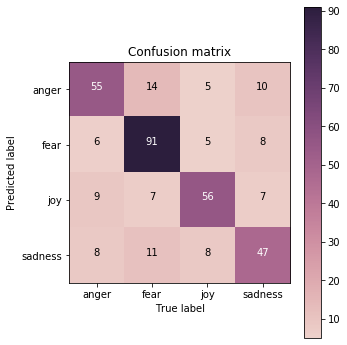

In [23]:
cm_NB = confusion_matrix(y_true=y_test, y_pred=y_test_NB_pred) 
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm_NB, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

The Naive Bayes model performance is a little better than the Decision Tree's performance.
The Naive Bayes model predicts the emotion of the next incoming data based on the probability of emotion appearing in the raw data. The Naive Bayes model is derived from Bayes' theorem, which assumes that features are independence. In our case, each sentence corresponds to only one emotion. This may be the reason why the Naive Bayes model's prediction results are a little better than the Decision Tree's result.

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

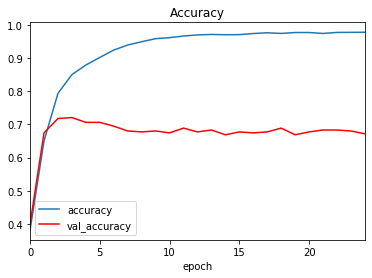

In [25]:
import matplotlib.pyplot as plt

training_log = pd.read_csv("logs/training_log.csv")

ax=plt.gca()

training_log.plot(kind='line', x='epoch', y='accuracy',title='Accuracy', ax=ax)
training_log.plot(kind='line', x='epoch', y='val_accuracy',color='red', ax=ax)
plt.show()

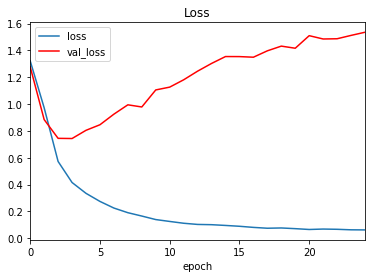

In [26]:
ax=plt.gca()
training_log.plot(kind='line', x='epoch', y='loss',title='Loss', ax=ax)
training_log.plot(kind='line', x='epoch', y='val_loss',color='red', ax=ax)
plt.show()

****
In image of Accuracy, the accuracy of training data and the accuracy of validation data both increase at the begining. However, the accuracy of the validation data stop increase and stay around 0.7 later on. 


---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


We will convert the word vector into a vector in the order of the sentences. Then take this vector as input, put it into the neural network model as training data, and finally use this model as the prediction model. We can use LSTM model, unlike standard neural networks, LSTM has feedback connections. It can not only process single word, but also entire sequences of data. Standard neural networks only have one direction. It processes the data from the beginning to the end. So, it cannot cover the information after the current word. There are three parts in a standard LSTM cell, an input gate, an output gate and a forget gate. The cell will remember the values in a period of time and the three gates control the flow of information into and out of the cell.

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [27]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

load ok


In [28]:
word_list = ['angry', 'happy', 'sad', 'fear']

topn = 15
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('angry_words: ', angry_words)
print('happy_words: ', happy_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = angry_words + happy_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'e

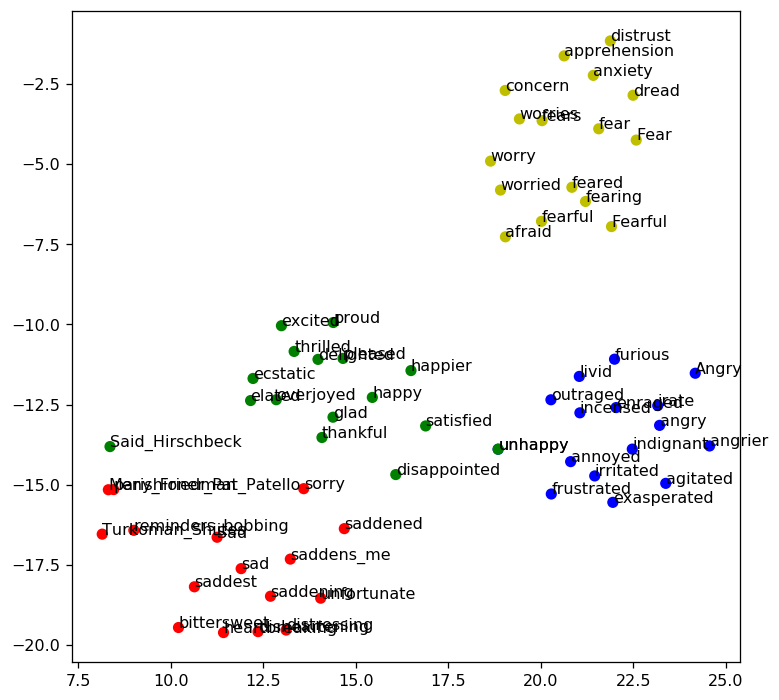

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
# cosine is cosine similarity
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

# PART THREE
## Kaggle Competition Report

I used a variety of models to try to find the one that performed best.
I use TFIDF as Vectorizer and use Naive Bayes classifier(which is not good), Decision Trees(better than NB), k-Nearest Neighbors (which is not complete because it consumes too much time), LogisticRegression (which achieve about 0.46 scores) and SVM(bad performance). 
After all of the above, I tried BERT. In the beginning, I always encountered memory error, kernel report CUDA run out, so I first sampled to debug with a smaller sample. I found that even with a small sample (n = 10000), I can already achieve a score of about 0.4 due to the power of BERT itself. Finally, I use all the data to do the training, the same problem encountered(CUDA run out). I set the batch size smaller to fix the problem.
In the preprocessing part, considering that all symbols may represent some kind of emotional meaning, I did not remove the seemingly meaningless symbols like most people (for example: ...). I think these symbols also reflect the psychological state of the poster to a certain extent.

## Code

TFIDF,the Naive Bayes classifier, Decision Trees, k-Nearest Neighbors, LogisticRegression and SVM.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

## TFIDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=10000)
vect = vectorizer.fit(train_df.text)
tfidf_train = vect.transform(train_df.text)
tfidf_given_test = vect.transform(test_df.text)

In [ ]:
X = tfidf_train
y = train_df['emotion']

## Naive Bayes classifier

In [ ]:
#y_train = train_df['emotion']

#from sklearn.datasets import make_classification

#nb_samples = 300
#X, Y = make_classification(n_samples=nb_samples, n_features=2, n_informative=2, n_redundant=0)

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_train) #predict from training data
y_test_pred = gnb.predict(X_test) #這是已知emotion 的testing ata
test_pred = gnb.predict(tfidf_given_test) #這是預測出來的情緒

In [ ]:
print("Number of mislabeled points out of a total %d points : %d"
      % (X_train.shape[0],(y_train != y_pred).sum()))
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0],(y_test_pred != y_test).sum()))

## Decision Trees

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_train) #predict from training data
y_test_pred = clf.predict(X_test) #這是已知emotion 的testing data
test_pred = clf.predict(tfidf_given_test) #這是預測出來的情緒
print("Number of mislabeled points out of a total %d points : %d"
      % (X_train.shape[0],(y_train != y_pred).sum()))
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0],(y_test_pred != y_test).sum()))

## k-Nearest Neighbors

In [ ]:
# training a KNN classifier 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 9).fit(X_train, y_train) 
  
y_pred = knn.predict(X_train) #predict from training data
y_test_pred = knn.predict(X_test) #這是已知emotion 的testing data
test_pred = knn.predict(tfidf_given_test) #這是預測出來的情緒

# accuracy on X_test 
accuracy = knn.score(X_test, y_test) 
print(accuracy)

print("Number of mislabeled points out of a total %d points : %d"
      % (X_train.shape[0],(y_train != y_pred).sum()))
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0],(y_test_pred != y_test).sum()))

## LogisticRegression

In [ ]:
#from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='saga',
                         multi_class='multinomial')
clf =clf.fit(X, y)
y_pred = clf.predict(X)
test_pred = clf.predict(tfidf_given_test) #這是預測出來的情緒

print("Number of mislabeled points out of a total %d points : %d"
      % (X.shape[0],(y != y_pred).sum()))

## SVM(Support vector machine) classifier

In [ ]:
# training a DescisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train) 
#dtree_predictions = dtree_model.predict(X_test) 
y_pred = dtree_model.predict(X_train) #predict from training data
y_test_pred = dtree_model.predict(X_test) #這是已知emotion 的testing data
test_pred = dtree_model.predict(tfidf_given_test) #這是預測出來的情緒

print("Number of mislabeled points out of a total %d points : %d"
      % (X_train.shape[0],(y_train != y_pred).sum()))
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0],(y_test_pred != y_test).sum()))

dtree_model.score(X_train, y_train)

## Convert to Upload format

In [ ]:
test_df['emotion']= test_pred
test_df.rename(columns={'tweet_id':'id'}, inplace=True)
uploadfile = test_df.drop(columns={'index','_score','_index','_source','_crawldate','_type','text','hashtag','identification'},axis=1)
# Output csv
uploadfile.to_csv('sampleSubmission1125.csv',index=False)

# BERT

In [ ]:
import glob
import pandas as pd

In [ ]:
import torch
from transformers import BertTokenizer
from IPython.display import clear_output

#PRETRAINED_MODEL_NAME = "bert-base-chinese"  # 指定繁簡中文 BERT-BASE 預訓練模型
PRETRAINED_MODEL_NAME = "bert-large-cased"  #通常英文的case使用的模型

# 取得此預訓練模型所使用的 tokenizer
tokenizer = BertTokenizer.from_pretrained(PRETRAINED_MODEL_NAME)

clear_output()
print("PyTorch 版本：", torch.__version__)

In [ ]:
####note 要重新切validation dataset 先shuffle data 再切80％ 20%
all_df = pd.read_pickle("train_df.pkl")
all_df = all_df.sample(frac=1) #shuffle training dataset

In [ ]:
#validation_df = all_df.sample(4682)

train_pct_index = int(0.8 * len(all_df))
train_df, validation_df = all_df[:train_pct_index], all_df[train_pct_index:]
#y_train, y_test = y[:train_pct_index], y[train_pct_index:]

#切dataframe的時候 要記得把index reset
train_df = train_df.reset_index(drop=True)
validation_df = validation_df.reset_index(drop=True)

In [ ]:
test_df = pd.read_pickle("test_df.pkl")
#test_df = test_df.sample(1000)
#test_df = test_df.reset_index(drop=True)

In [ ]:
test_df.insert(10,column="emotion",value="")

In [ ]:
train_df = train_df.drop(columns={'index','_score','_index','_source','_crawldate','_type','hashtag','identification'},axis=1)

In [ ]:
# 剔除過長的樣本以避免 BERT 無法將整個輸入序列放入記憶體不多的 GPU
MAX_LENGTH = 500
train_df = train_df[~(train_df.text.apply(lambda x : len(x)) > MAX_LENGTH)]
print("訓練樣本數：", len(train_df))
train_df

In [ ]:
train_df.text.map(lambda x: len(x)).max()

In [ ]:
#實作一個可以用來讀取訓練 / 測試集的 Dataset，這是你需要徹底了解的部分。
#此 Dataset 每次將 tsv 裡的一筆成對句子轉換成 BERT 相容的格式，並回傳 3 個 tensors：
#- tokens_tensor：兩個句子合併後的索引序列，包含 [CLS] 與 [SEP]
#- segments_tensor：可以用來識別兩個句子界限的 binary tensor
#- label_tensor：將分類標籤轉換成類別索引的 tensor, 如果是測試集則回傳 None
from torch.utils.data import Dataset
import numpy as np
    
class EmotionDataset(Dataset):
    # 讀取前處理後的 tsv 檔並初始化一些參數
    def __init__(self, mode, tokenizer):
        assert mode in ["train", "test","val"]  # 一般訓練你會需要 dev set
        self.mode = mode
        # 大數據你會需要用 iterator=True
        if mode == "train":
            self.df = train_df
        elif mode == "test":
            self.df = test_df
        elif mode == "val":
            self.df = validation_df
        self.len = len(self.df)
        self.label_map = {'anticipation': 0, 'joy': 1, 'disgust': 2, 'sadness': 3, 'trust': 4, 'fear': 5, 'surprise': 6, 'anger': 7}
        self.tokenizer = tokenizer  # 我們將使用 BERTall_df = pd.read_pickle('train_df.pkl') tokenizer
    
    # 定義回傳一筆訓練 / 測試數據的函式
    def __getitem__(self, idx):
        if self.mode == "test":
            text = self.df['text'][idx]
            label_tensor = None
        else:
            text = self.df['text'][idx]
            label = self.df['emotion'][idx]
            
            # 將 label 文字也轉換成索引方便轉換成 tensor
            label_id = self.label_map[label]
            label_tensor = torch.tensor(label_id)
            
        # 建立第一個句子的 BERT tokens 並加入分隔符號 [SEP]
        word_pieces = ["[CLS]"]
        tokens_text = self.tokenizer.tokenize(text)
        word_pieces += tokens_text + ["[SEP]"]
        len_a = len(word_pieces)
        
        # 將整個 token 序列轉換成索引序列
        ids = self.tokenizer.convert_tokens_to_ids(word_pieces)
        tokens_tensor = torch.tensor(ids)
        
        # 將第一句包含 [SEP] 的 token 位置設為 0，其他為 1 表示第二句
        segments_tensor = torch.tensor([0] * len_a, 
                                        dtype=torch.long)
        
        return (tokens_tensor, segments_tensor, label_tensor)
    
    def __len__(self):
        return self.len
    
    
# 初始化一個專門讀取訓練樣本的 Dataset，使用中文 BERT 斷詞
trainset = EmotionDataset("train", tokenizer=tokenizer)

In [ ]:
"""
實作可以一次回傳一個 mini-batch 的 DataLoader
這個 DataLoader 吃我們上面定義的 `FakeNewsDataset`，
回傳訓練 BERT 時會需要的 4 個 tensors：
- tokens_tensors  : (batch_size, max_seq_len_in_batch)
- segments_tensors: (batch_size, max_seq_len_in_batch)
- masks_tensors   : (batch_size, max_seq_len_in_batch)
- label_ids       : (batch_size)
"""
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence

# 這個函式的輸入 `samples` 是一個 list，裡頭的每個 element 都是
# 剛剛定義的 `FakeNewsDataset` 回傳的一個樣本，每個樣本都包含 3 tensors：
# - tokens_tensor
# - segments_tensor
# - label_tensor
# 它會對前兩個 tensors 作 zero padding，並產生前面說明過的 masks_tensors
def create_mini_batch(samples):
    tokens_tensors = [s[0] for s in samples]
    segments_tensors = [s[1] for s in samples]
    
    # 測試集有 labels
    if samples[0][2] is not None:
        label_ids = torch.stack([s[2] for s in samples])
    else:
        label_ids = None
    
    # zero pad 到同一序列長度
    tokens_tensors = pad_sequence(tokens_tensors, 
                                  batch_first=True)
    segments_tensors = pad_sequence(segments_tensors, 
                                    batch_first=True)
    
    # attention masks，將 tokens_tensors 裡頭不為 zero padding
    # 的位置設為 1 讓 BERT 只關注這些位置的 tokens
    masks_tensors = torch.zeros(tokens_tensors.shape, 
                                dtype=torch.long)
    masks_tensors = masks_tensors.masked_fill(
        tokens_tensors != 0, 1)
    
    return tokens_tensors, segments_tensors, masks_tensors, label_ids


# 初始化一個每次回傳 64 個訓練樣本的 DataLoader
# 利用 `collate_fn` 將 list of samples 合併成一個 mini-batch 是關鍵
BATCH_SIZE = 16
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, 
                         collate_fn=create_mini_batch)

In [ ]:
# 載入一個可以做多分類任務的模型，n_class = 3
from transformers import BertForSequenceClassification

PRETRAINED_MODEL_NAME = "bert-base-cased"
NUM_LABELS = 8

model = BertForSequenceClassification.from_pretrained(
    PRETRAINED_MODEL_NAME, num_labels=NUM_LABELS)

clear_output()

# high-level 顯示此模型裡的 modules
print("""
name            module
----------------------""")
for name, module in model.named_children():
    if name == "bert":
        for n, _ in module.named_children():
            print(f"{name}:{n}")
    else:
        print("{:15} {}".format(name, module))

In [ ]:
"""
定義一個可以針對特定 DataLoader 取得模型預測結果以及分類準確度的函式
之後也可以用來生成上傳到 Kaggle 競賽的預測結果

2019/11/22 更新：在將 `tokens`、`segments_tensors` 等 tensors
丟入模型時，強力建議指定每個 tensor 對應的參數名稱，以避免 HuggingFace
更新 repo 程式碼並改變參數順序時影響到我們的結果。
"""

def get_predictions(model, dataloader, compute_acc=False):
    predictions = None
    correct = 0
    total = 0
      
    with torch.no_grad():
        # 遍巡整個資料集
        for data in dataloader:
            # 將所有 tensors 移到 GPU 上
            if next(model.parameters()).is_cuda:
                data = [t.to("cuda:0") for t in data if t is not None]
            
            
            # 別忘記前 3 個 tensors 分別為 tokens, segments 以及 masks
            # 且強烈建議在將這些 tensors 丟入 `model` 時指定對應的參數名稱
            tokens_tensors, segments_tensors, masks_tensors = data[:3]
            outputs = model(input_ids=tokens_tensors, 
                            token_type_ids=segments_tensors, 
                            attention_mask=masks_tensors)
            
            logits = outputs[0]
            _, pred = torch.max(logits.data, 1)
            
            # 用來計算訓練集的分類準確率
            if compute_acc:
                labels = data[3]
                total += labels.size(0)
                correct += (pred == labels).sum().item()
                
            # 將當前 batch 記錄下來
            if predictions is None:
                predictions = pred
            else:
                predictions = torch.cat((predictions, pred))
    
    if compute_acc:
        acc = correct / total
        return predictions, acc
    return predictions
    
# 讓模型跑在 GPU 上並取得訓練集的分類準確率
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("device:", device)
# model = model.to(device)
# _, acc = get_predictions(model, trainloader, compute_acc=True)
# print("classification acc:", acc)

In [ ]:
validation_set = EmotionDataset("val", tokenizer=tokenizer)
validation_loader = DataLoader(validation_set, batch_size=16, 
                        collate_fn=create_mini_batch)
# _, vacc = get_predictions(model, validation_loader, compute_acc=True)

In [ ]:
%%time

# 訓練模式
model.train()
model.to(device)
# 使用 Adam Optim 更新整個分類模型的參數
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)


EPOCHS = 2  # 幸運數字
for epoch in range(EPOCHS):
    output_dir = str(epoch + 1)
    running_loss = 0.0
    counter = 0.0
    for data in trainloader:
        
        tokens_tensors, segments_tensors, \
        masks_tensors, labels = [t.to(device) for t in data]

        # 將參數梯度歸零
        optimizer.zero_grad()
        
        # forward pass
        outputs = model(input_ids=tokens_tensors, 
                        token_type_ids=segments_tensors, 
                        attention_mask=masks_tensors, 
                        labels=labels)
        loss = outputs[0]
        # backward
        loss.backward()
        optimizer.step()
        

        # 紀錄當前 batch loss
        # 可能可以改成算mean而不是sum
        running_loss += loss.item()
        counter += 1
    # 計算分類準確率
    _, acc = get_predictions(model, trainloader, compute_acc=True)
    #model_to_save = model.module if hasattr(model, 'module') else model
    #model_to_save.save_pretrained(output_dir)
    des = "bert" + str(epoch+1) + ".pt"
    torch.save(model.state_dict(), des)
    #torch.save(,os.path.join(output_dir, 'training_args.bin'))
    _, vacc = get_predictions(model, validation_loader, compute_acc=True)
    print('[epoch %d] loss: %.3f, acc: %.3f, validation acc: %.3f' %
          (epoch + 1, running_loss/counter , acc, vacc))
    

[epoch 1] loss: 1.045, acc: 0.675, validation acc: 0.650
[epoch 2] loss: 0.888, acc: 0.714, validation acc: 0.663
CPU times: user 9h 15min 7s, sys: 2h 58min 30s, total: 12h 13min 38s
Wall time: 12h 15min 28s

In [ ]:
%%time
#model.load_state_dict(torch.load("bert2.pt"))
# 建立測試集。這邊我們可以用跟訓練時不同的 batch_size，看你 GPU 多大
testset = EmotionDataset("test", tokenizer=tokenizer)
testloader = DataLoader(testset, batch_size=32, 
                        collate_fn=create_mini_batch)

# 用分類模型預測測試集
predictions = get_predictions(model, testloader)

# 用來將預測的 label id 轉回 label 文字
index_map = {v: k for k, v in testset.label_map.items()}

In [ ]:
# 生成 Kaggle 繳交檔案
df = pd.DataFrame({"emotion": predictions.tolist()})
df['emotion'] = df.emotion.apply(lambda x: index_map[x])
df_pred = pd.concat([testset.df.loc[:, ["tweet_id"]], 
                          df.loc[:, 'emotion']], axis=1)
df_pred.rename(columns={'tweet_id':'id'}, inplace=True)
df_pred.to_csv('bert_1126.csv', index=False)
df_pred.head()